Load the Dataset 
To check for the assumptions of linear regression, such as linearity, homoscedasticity, independence, and normality, we can use several methods and visualizations. Here's how we can approach each one using Python:

    Linearity: This can be checked with a scatter plot of observed vs. predicted values or independent vs. dependent variables.

    Homoscedasticity: This refers to the assumption that the residuals (differences between observed and predicted values) have constant variance at all levels of the independent variable(s). We can visualize this using a scatter plot of residuals vs. predicted values or independent variables.

    Independence: This is the assumption that the residuals are independent of each other. This is more of an experimental design issue, but Durbin-Watson statistics can be used to test for autocorrelation in the residuals.

    Normality: The assumption that the residuals are normally distributed can be checked with a Q-Q plot or a histogram.

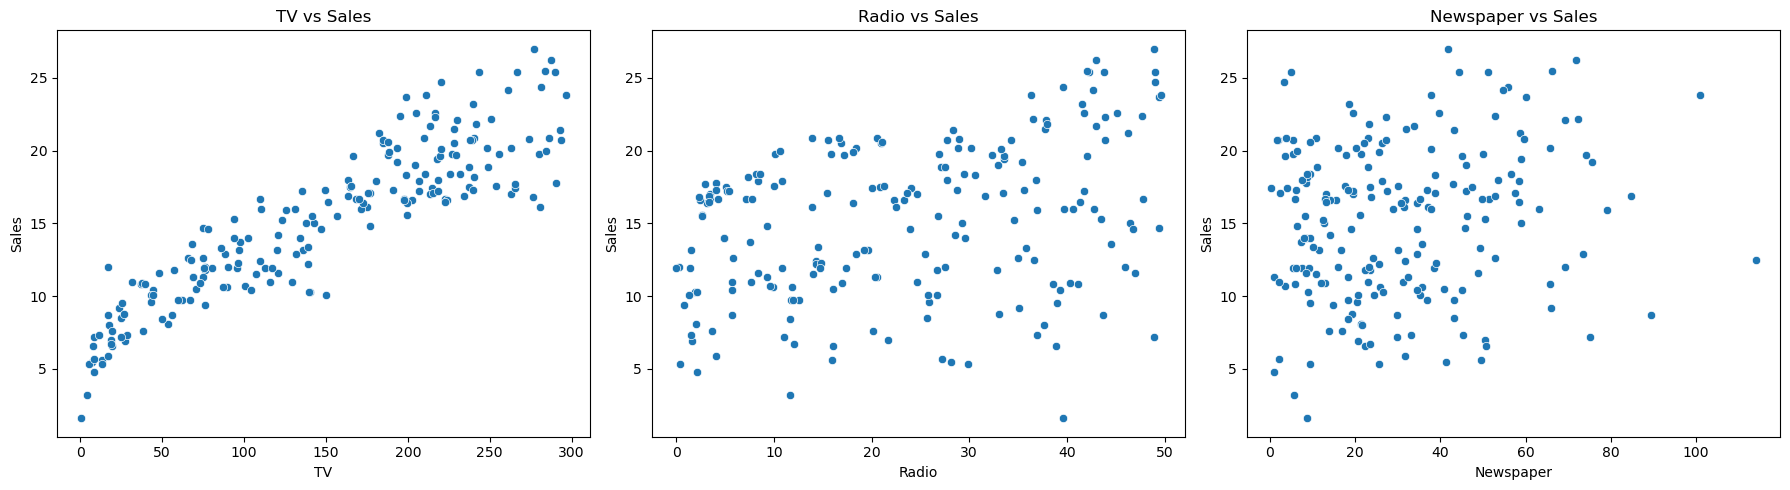

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Load the dataset
file_path = 'advertising.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

# Plotting scatter plots for each independent variable vs. Sales to check for linearity

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# TV vs Sales
sns.scatterplot(data=data, x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV vs Sales')

# Radio vs Sales
sns.scatterplot(data=data, x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio vs Sales')

# Newspaper vs Sales
sns.scatterplot(data=data, x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper vs Sales')

plt.tight_layout()
plt.show()


The scatter plots for TV vs. Sales and Radio vs. Sales suggest a linear relationship, as the points could reasonably fit a straight line. However, the relationship between Newspaper and Sales is less clear and may not be linear.

Next, we will fit a linear regression model to the data and use the residuals from this model to check for homoscedasticity, independence, and normality. We'll start by fitting the model and then plot the residuals to check for homoscedasticity.

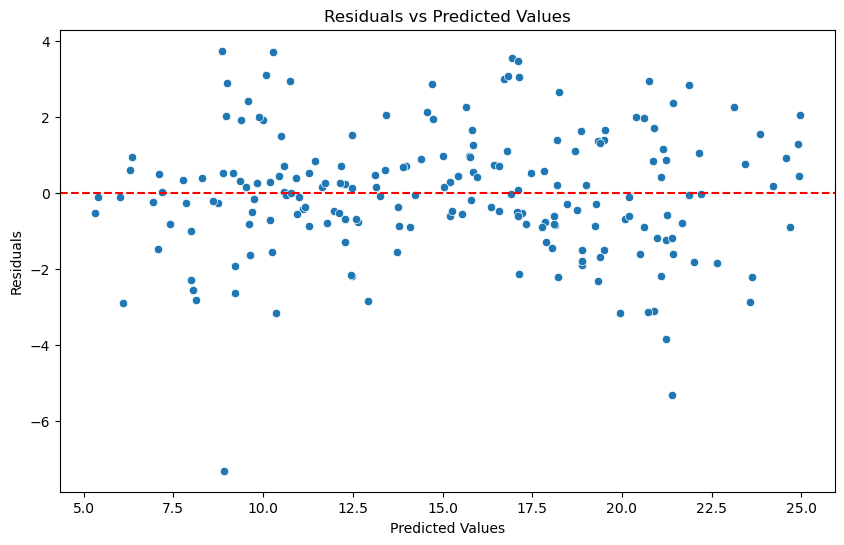

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.13e-99
Time:                        06:39:11   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [2]:
# Fit the linear regression model
X = data[['TV', 'Radio', 'Newspaper']]  # Independent variables
y = data['Sales']                        # Dependent variable

# Adding a constant to the model for the intercept
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Getting the predictions and residuals
predictions = model.predict(X)
residuals = model.resid

# Plotting residuals to check for homoscedasticity
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Output the model summary to also check for Durbin-Watson statistic for independence
model_summary = model.summary()
model_summary



    Dependent Variable (Dep. Variable): The dependent variable is "Sales." This is what the model is trying to predict or explain.

    Model: OLS, indicating that the method used for the regression is Ordinary Least Squares.

    Method: Least Squares, which means the best-fitting line is determined by minimizing the sum of the squares of the residuals (the differences between the observed values and the values predicted by the model).

    Date: The model was run on Wednesday, December 20, 2023.

    Time: The model was run at 06:39:11 AM.

    No. Observations: There were 200 observations used in the regression.

    DF Residuals: The degrees of freedom of the residuals, which is the number of observations minus the number of parameters estimated, is 196.

    DF Model: 3, indicating that there are three predictors included in the model (TV, Radio, Newspaper).

    R-squared: 0.945, which means approximately 94.5% of the variation in sales can be explained by the model. This is a measure of the model's goodness of fit.

    Adjusted R-squared: 0.901, which adjusts the R-squared value based on the number of predictors and the number of observations. It's slightly lower, suggesting that some of the predictors may not be contributing much to the model.

    F-statistic: 605.4, this is a measure of the overall significance of the model. The associated prob (F-statistic), also known as the p-value for the F-test, is 8.13e-99, which is practically 0, indicating that the model is statistically significant.

    Log-Likelihood: The log of the likelihood function evaluated at the estimated parameters is -383.34.

    AIC: Akaike Information Criterion is 774.7. It is a measure of the relative quality of statistical models for a given set of data.

    BIC: Bayesian Information Criterion is 787.9. Like AIC, it's used for model selection, but it introduces a greater penalty for models with more parameters.

    Covariance Type: nonrobust, suggesting that the standard errors are calculated without correction for heteroskedasticity or autocorrelation.

Coefficients table:

    const: The intercept is 4.6251. The p-value is 0.000, suggesting the intercept is statistically significant.

    TV: The coefficient for TV is 0.0544. This suggests that for each additional unit of TV advertising, sales increase by 0.0544 units. The p-value is 0.000, indicating this predictor is highly significant.

    Radio: The coefficient is 0.1070, with a very low p-value, indicating a strong relationship between radio advertising and sales.

    Newspaper: The coefficient is much lower at 0.0003, and the p-value is 0.954, suggesting that newspaper advertising does not have a statistically significant effect on sales.

Diagnostic tests:

    Omnibus: The Omnibus test has a statistic of 16.081, with a Prob(Omnibus) of 0.000, suggesting that the residuals are not normally distributed.

    Skew: The value of -0.431 indicates that the residual distribution is slightly skewed to the left.

    Kurtosis: At 4.605, the peak of the residual distribution is higher than that of a normal distribution, indicating leptokurtosis.

    Durbin-Watson: The statistic is 2.251, which is close to 2, suggesting that there is no strong evidence of autocorrelation in the residuals.

    Jarque-Bera (JB): The JB test has a statistic of 27.655 with a Prob(JB) close to 0, indicating that the residuals do not follow a normal distribution, corroborating the Omnibus test.

    Condition Number: A condition number of 454 indicates potential issues with multicollinearity, meaning that some of the predictors might be highly correlated with each other.

In summary, the model shows that TV and Radio are significant predictors of sales, while Newspaper is not. The model fits the data well based on the R-squared value, but some diagnostic tests indicate potential issues with the normality of residuals and multicollinearity.

The scatter plot of residuals vs. predicted values shows a random pattern, which is a good indication of homoscedasticity, meaning the variance of the residuals is constant across all levels of the independent variable.

From the regression output, the Durbin-Watson statistic is 2.251, which is close to 2. This suggests that there is no strong autocorrelation in the residuals, supporting the assumption of independence.

Now let's check for normality of the residuals using a Q-Q plot and a histogram.


C:\Users\HP\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


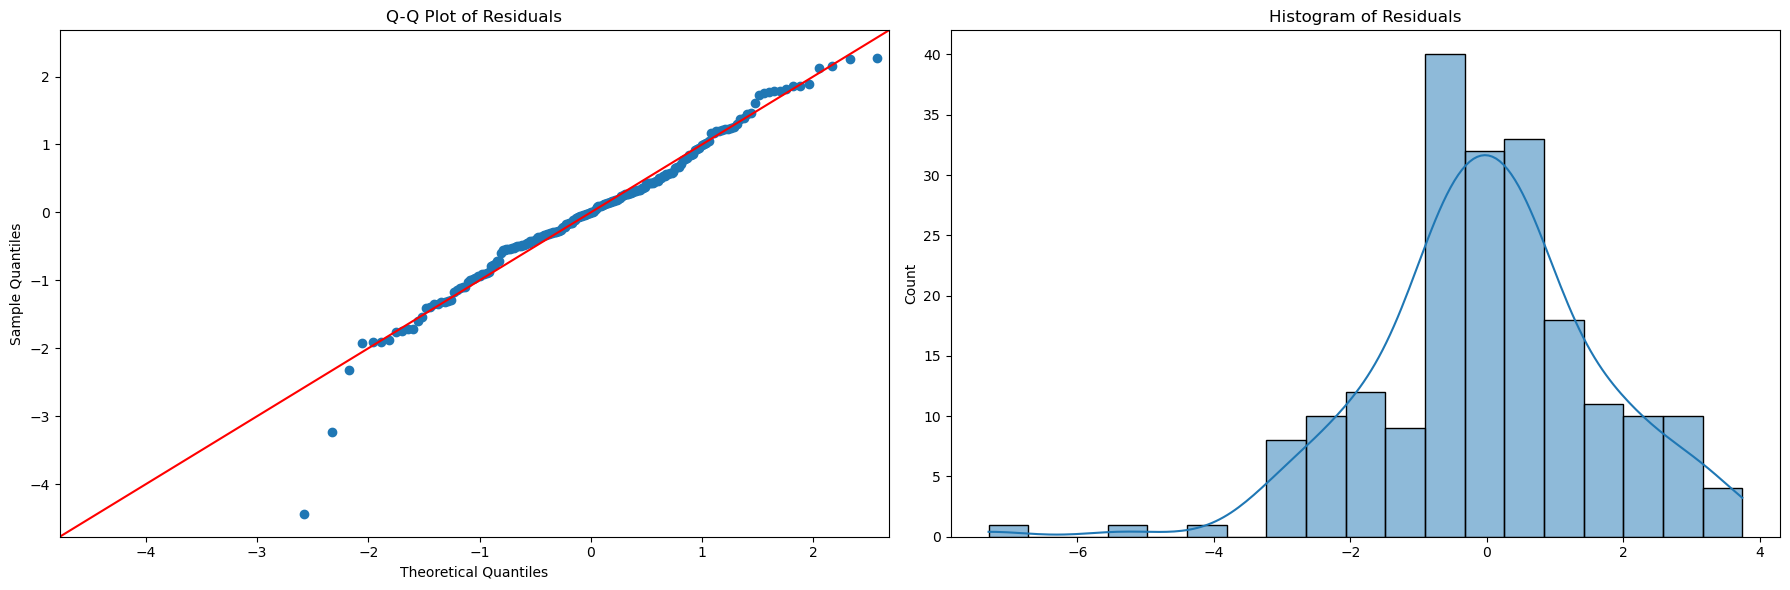

ShapiroResult(statistic=0.9758140444755554, pvalue=0.0015761888353154063)

In [3]:
# Checking for normality of residuals with Q-Q plot and histogram

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Q-Q plot
sm.qqplot(residuals, line='45', fit=True, ax=ax[0])
ax[0].set_title('Q-Q Plot of Residuals')

# Histogram
sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title('Histogram of Residuals')

plt.tight_layout()
plt.show()

# Perform a Shapiro-Wilk test to test the normality statistically
shapiro_test = stats.shapiro(residuals)
shapiro_test


The Q-Q plot shows that the residuals mostly follow the 45-degree line, indicating that they are approximately normally distributed. However, there is some deviation from normality in the tails.

The histogram also shows that the distribution of residuals is roughly bell-shaped, which is consistent with a normal distribution, but the Shapiro-Wilk test for normality gives a p-value of approximately 0.0016. Since this p-value is less than 0.05, we would reject the null hypothesis of normality at the 5% significance level, suggesting that the residuals are not normally distributed.

To improve the model, one might consider transformations of the data or look for outliers and leverage points that could be influencing the results. Additionally, it might be helpful to consider other variables or interactions that could better explain the variance in sales

To implement gradient descent for linear regression, we'll need to set up the cost function, compute gradients, and update the parameters iteratively. We'll use the mean squared error (MSE) as our cost function. Here's a basic outline of the steps we'll follow in our gradient descent implementation:

    Initialize the model parameters (the weights and bias).
    Define the cost function (MSE in this case).
    Calculate the gradients of the cost function with respect to each parameter.
    Update the parameters in the direction that reduces the cost function.
    Repeat steps 2-4 until the algorithm converges (i.e., the cost function stops changing or changes very slowly) or until we reach a predefined number of iterations.

    Normalize the data: Scale the features so that they have a mean of 0 and a standard deviation of 1.
    Adjust the learning rate: Use a smaller learning rate to avoid taking too large steps which can cause the algorithm to diverge.
    Increase iterations: If we use a smaller learning rate, we might need more iterations for the algorithm to converge.

<Axes: >

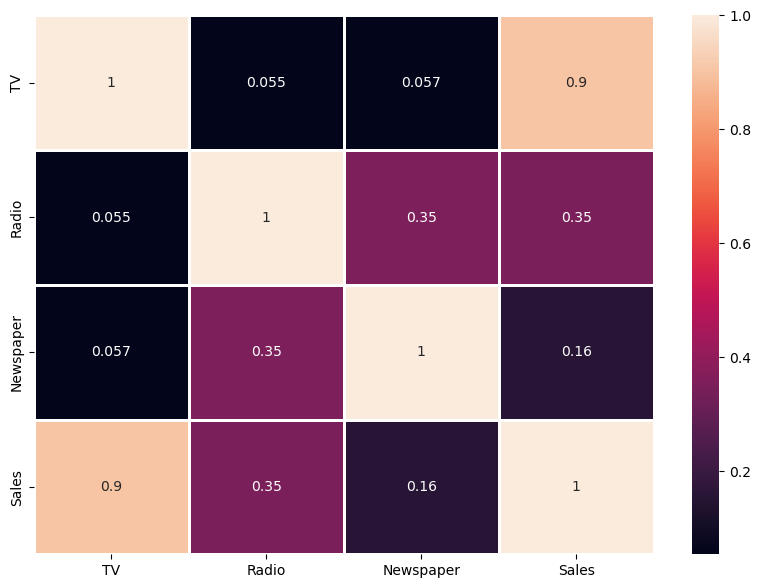

In [4]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,linewidths=2)

Find linear relationship between the predictors

Text(0.5, 1.0, 'Radio vs Radio')

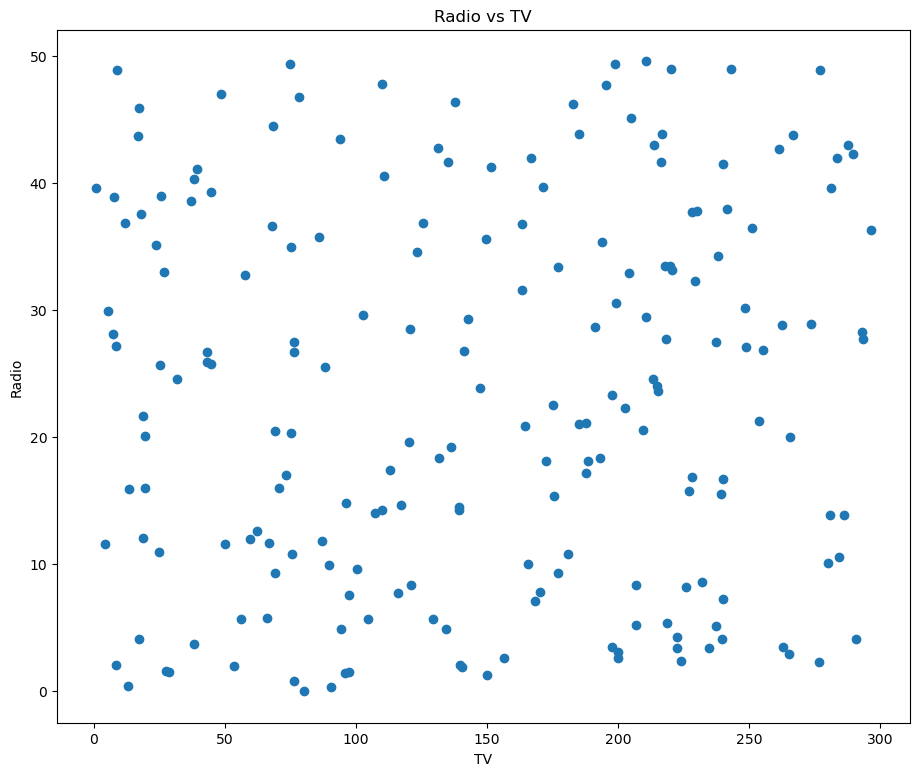

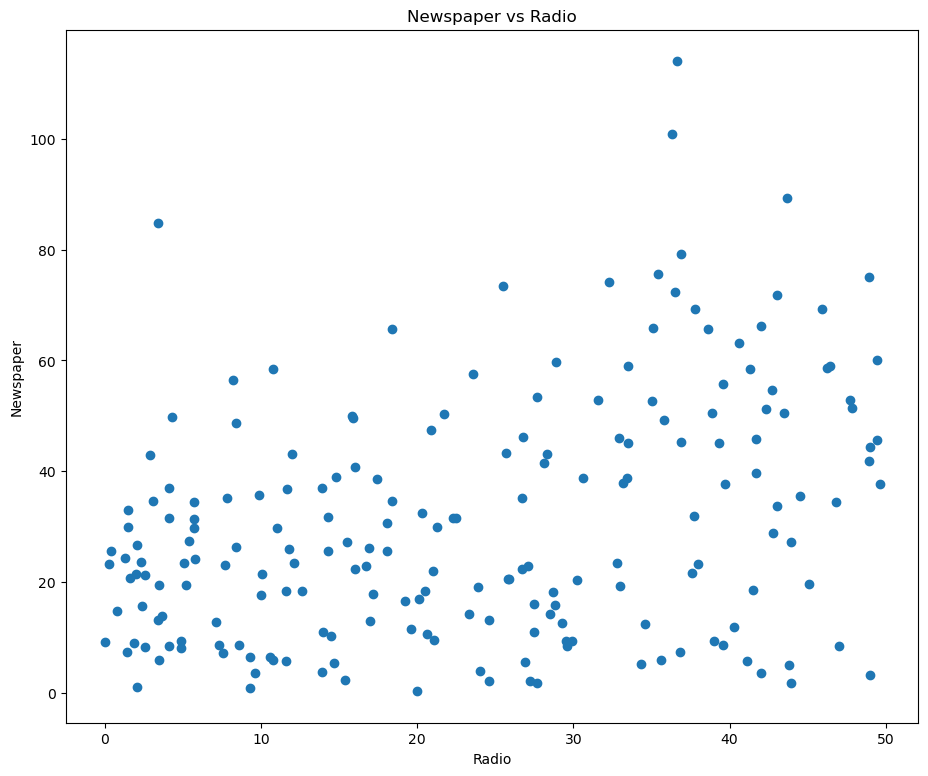

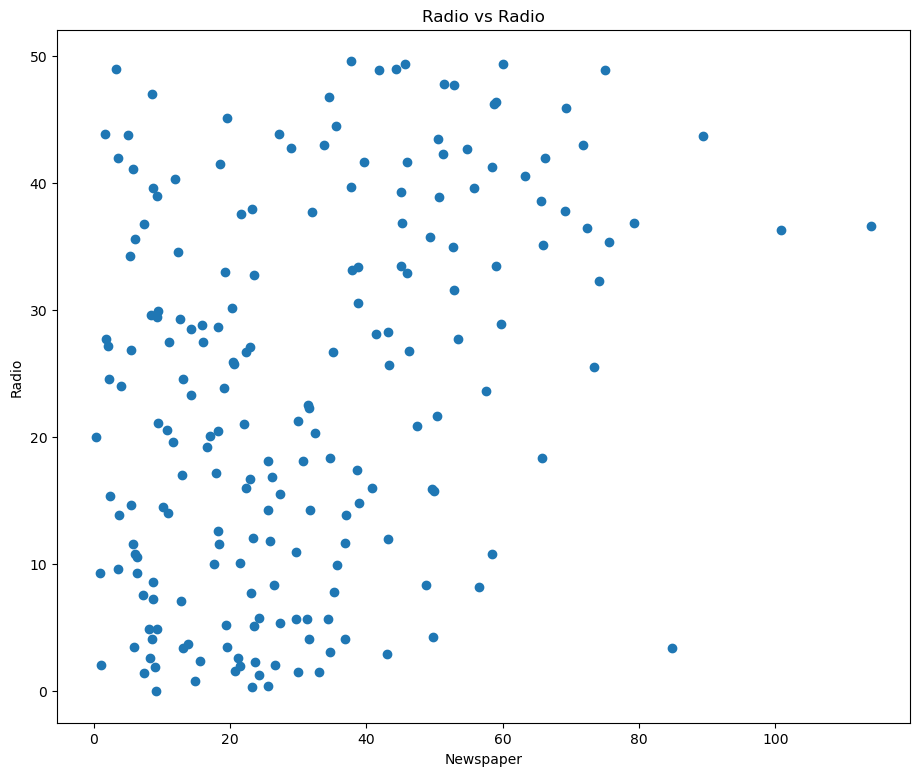

In [5]:
### Visualize the relationship using scatterplot
df=data
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Radio"])
plt.xlabel("TV")
plt.ylabel("Radio")
plt.title("Radio vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Newspaper"])
plt.xlabel("Radio")
plt.ylabel("Newspaper")
plt.title("Newspaper vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Radio"])
plt.xlabel("Newspaper")
plt.ylabel("Radio")
plt.title("Radio vs Radio")

In [6]:
#prepare dataset
### Separate the predictor and the target variable 
x = df.drop("Sales", axis = 1)
y = df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [7]:
### Train-Test Split
##### For Preprocessing #####
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

##### For Building the Model #####
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

##### For Validation of the Model #####
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

print("x_train size:", x_train.shape)
print("y_train size:", y_train.shape)
print("\nx_test size:", x_test.shape)
print("y_test size:", y_test.shape)

x_train size: (150, 3)
y_train size: (150,)

x_test size: (50, 3)
y_test size: (50,)


In [8]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

In [9]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

R2: 0.90514835876105
MAE: 1.119994071336177
MSE: 2.4040674447118864
RMSE: 1.550505544882664
Cross-Val Results: [0.89391193 0.84835255 0.91336339 0.93740449 0.90972209 0.92995146
 0.85494586 0.83727721 0.86267846 0.927566  ]
Cross-Val Mean: 0.8915173447734139


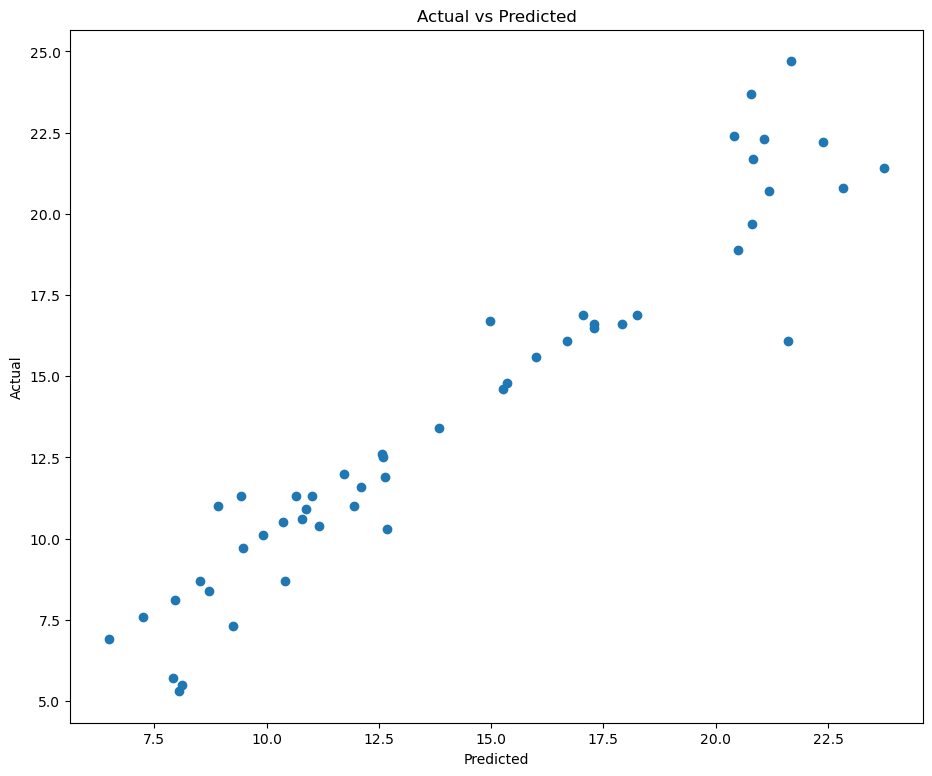

In [11]:
### Predict and get results
import numpy as np
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})


In [ ]:
!pip install --upgrade pandas


R2: 0.7550093961233676
MAE: 1.8651146911099161
MSE: 5.513351187165511
RMSE: 2.3480526372220685
Cross-Val Results: [0.83283252 0.72444029 0.77846467 0.87955404 0.76065371 0.88067487
 0.83508629 0.66102314 0.73611831 0.83119639]
Cross-Val Mean: 0.7920044239035755


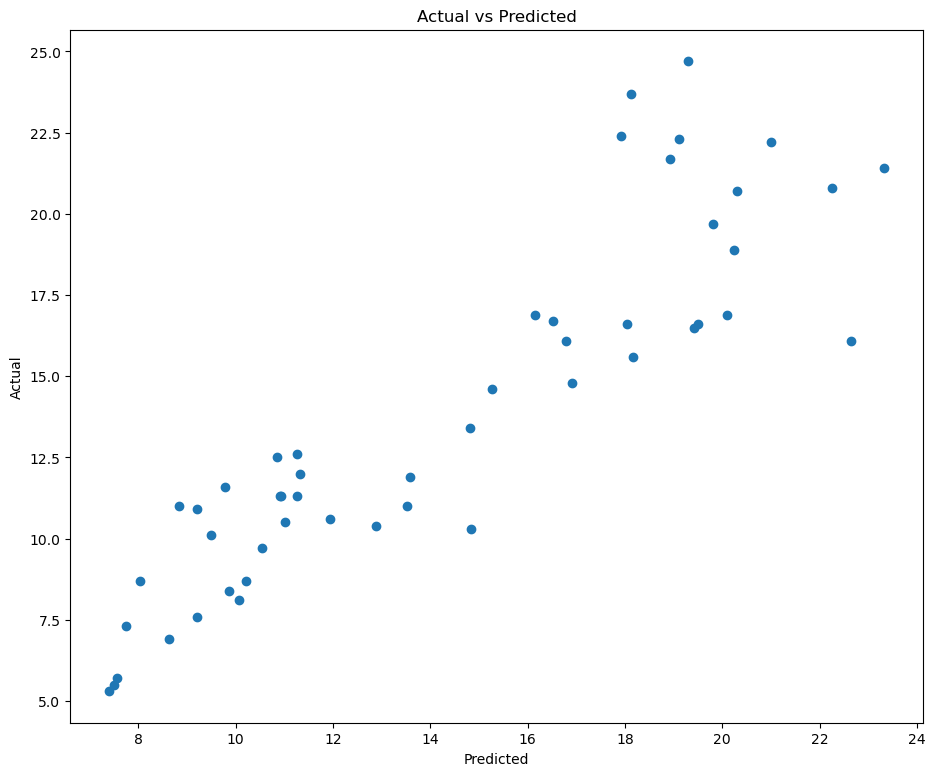

In [12]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})
df_results = pd.DataFrame([linreg_TV_results])

In [13]:
linreg_TV_results

{'R2': 75.50093961233677,
 'MAE': 1.8651146911099161,
 'MSE': 5.513351187165511,
 'RMSE': 2.3480526372220685,
 'Predictor/s': 'TV',
 'Cross-Val Mean': 79.20044239035755}

R2: 0.9065132059179849
MAE: 1.1144571493849897
MSE: 2.356396290987084
RMSE: 1.535055794095799
Cross-Val Results: [0.89398144 0.84855767 0.91492421 0.93757095 0.91060097 0.93060159
 0.85490051 0.83752431 0.86285024 0.92852052]
Cross-Val Mean: 0.8920032415598959


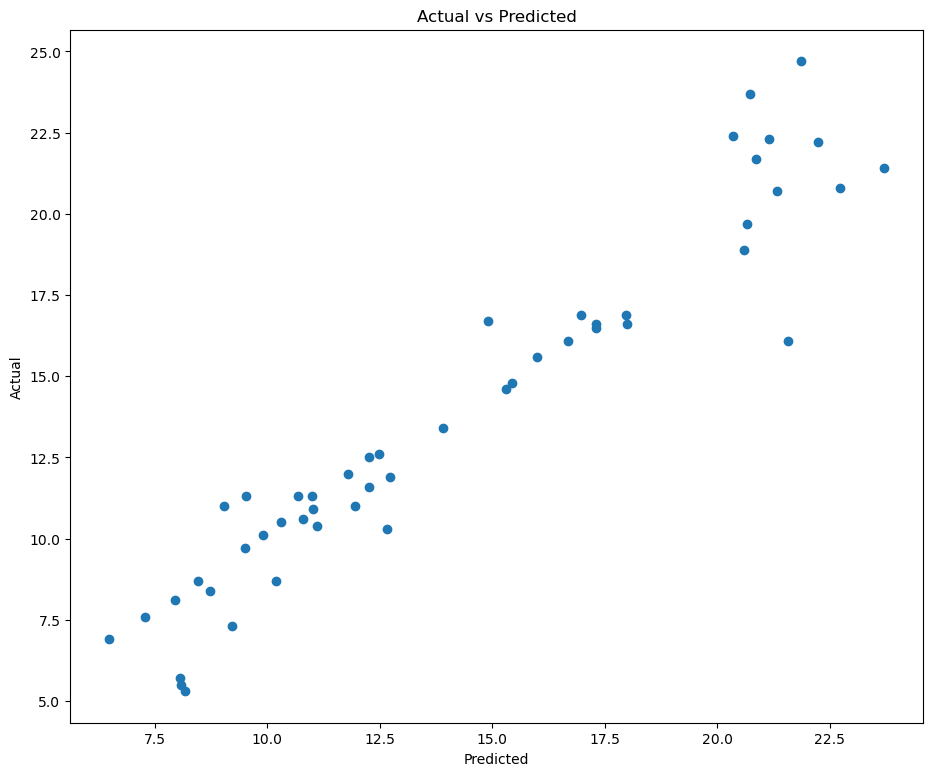

In [14]:
linreg_TVR_results = linreg_model(x_train[["TV", "Radio"]], x_test[["TV", "Radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "Radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results2 = pd.DataFrame([linreg_TV_results])


The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.

These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales.

Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper.